In [129]:
import nbimporter
from task_2 import grad_descent, plot_3d, plot_points
from matplotlib import pyplot as plt, cm
import numpy as np
import random
import matplotlib.colors as mcolors

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 100

In [130]:
class Func:
    def __init__(self, coefficients):
        self.coefficients = coefficients

    def __call__(self, args):
        return sum([arg ** 2 * c for arg, c in zip(args, self.coefficients)])

    def df(self):
        return Func(list(map(lambda x: x * 2, self.coefficients)))

    def latex(self):
        return '$' + ' + '.join(['{:.2f} \cdot x_{}^2'.format(c, i) for i, c in enumerate(self.coefficients)]) + '$'


def gen_function_with_condition_number(n, condition_number):
    mul = random.uniform(1, 10)
    max_eigen = mul * condition_number
    min_eigen = mul
    between = [random.uniform(min_eigen, max_eigen) for _ in range(n - 2)]
    coefficients = [max_eigen, min_eigen] + between
    random.shuffle(coefficients)

    return Func(coefficients)

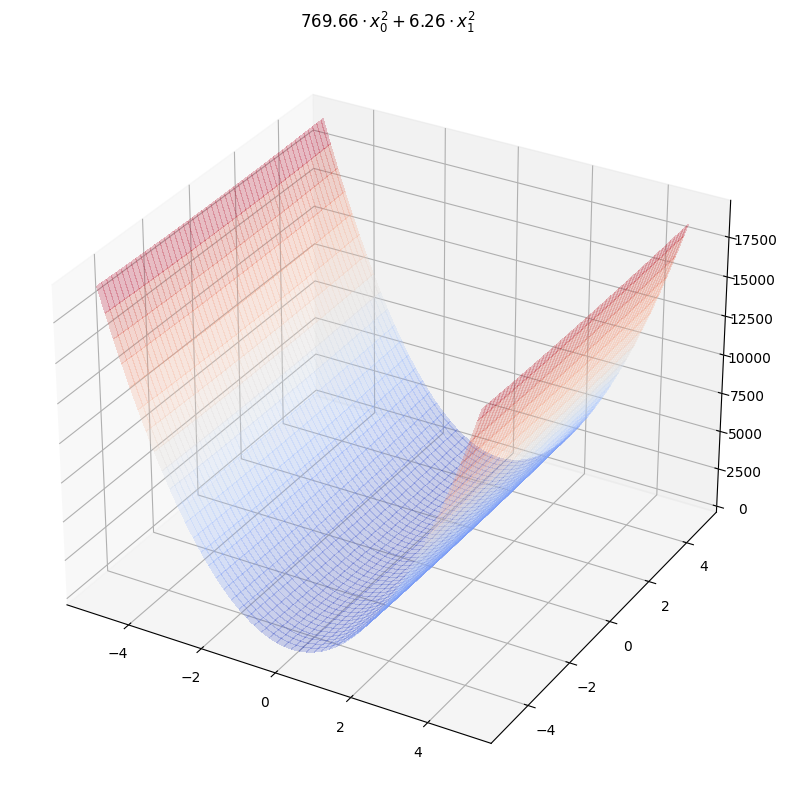

In [134]:
f = gen_function_with_condition_number(2, 123)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plot_3d(ax, f, [-5, 5], [-5, 5])
ax.set_title(f.latex())
plt.show()

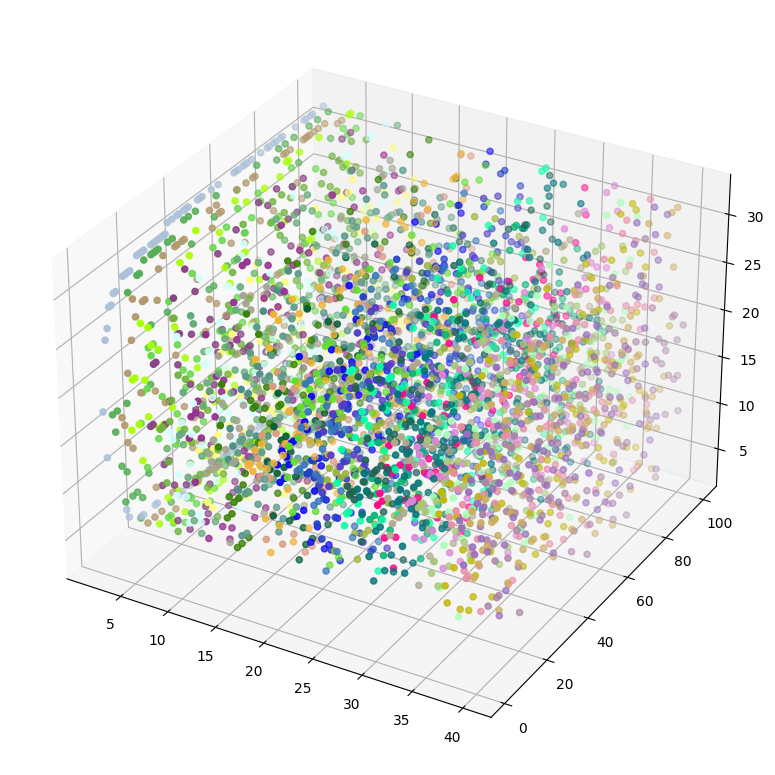

In [132]:
start = [0.001, 30]  # [random.uniform(0, 10), random.uniform(0, 10)]
results = []
max_n = 41
for n in range(2, max_n):
    results_n = []
    for condition_number in np.linspace(1, 100, 100):
        f = gen_function_with_condition_number(n, condition_number)
        points = grad_descent(f, f.df(), start)
        results_n.append([n, condition_number, len(points)])
    results.append(results_n)

results = np.array(results)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
colors = []
for r, c in zip(results, mcolors.XKCD_COLORS):
    ax.scatter3D(r[:, 0], r[:, 1], r[:, 2], c=c)
plt.show()

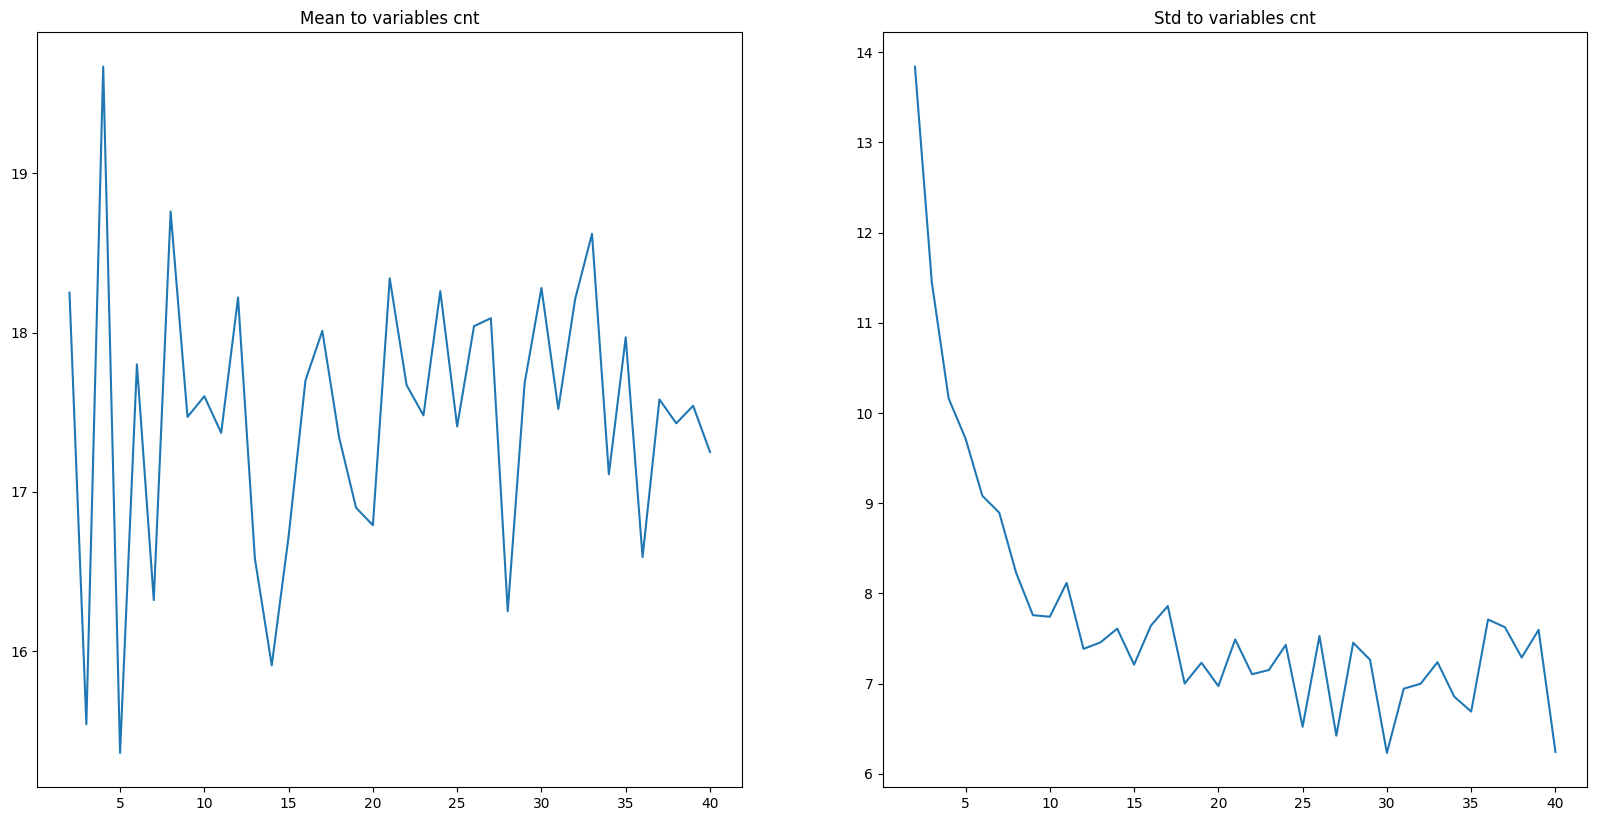

In [133]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 10])
mean_iterations = [np.mean(r[:, 2]) for r in results]
ax1.plot(range(2, max_n), mean_iterations)
ax1.set_title("Mean of iterations to variables cnt")

mean_iterations = [np.std(r[:, 2]) for r in results]
ax2.plot(range(2, max_n), mean_iterations)
ax2.set_title("Std of iterations to variables cnt")
plt.show()

Количество итераций сильно зависит от стартовой точки